In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = "Hiragino Maru Gothic Pro"
plt.style.use("ggplot")  # グラフのスタイル
plt.rcParams["figure.figsize"] = [12, 9]  # グラフサイズ設定

df = pd.read_csv("./datasets/fixed_battery_log_2.csv")
df["date"] = pd.to_datetime(df["date"])
users = df["User"].unique()
users

array(['Narita', 'Yusuke', 'Ayumi', 'Daiki', 'Shunya', 'Hayate',
       'Moriyama', 'Isshin'], dtype=object)

/var/folders/vq/5w5tvr9d2ns_2m_ynwknf3yc0000gn/T/ipykernel_27720/2202963258.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


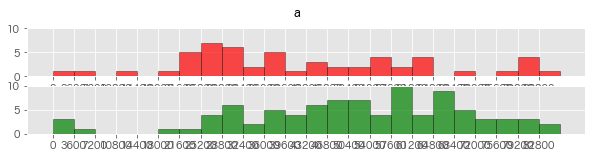

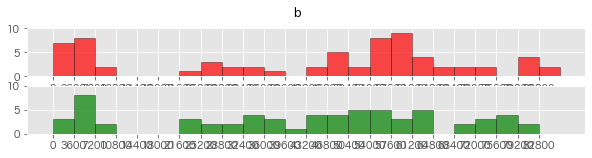

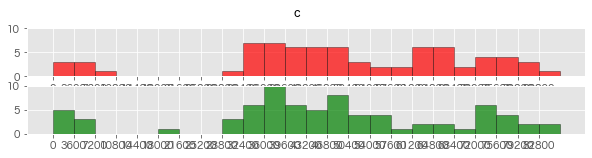

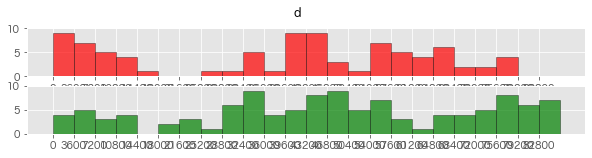

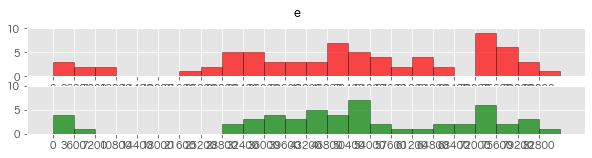

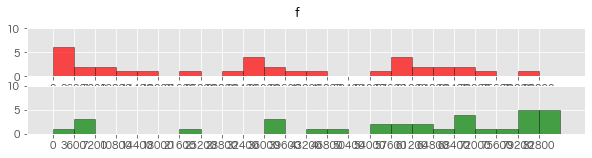

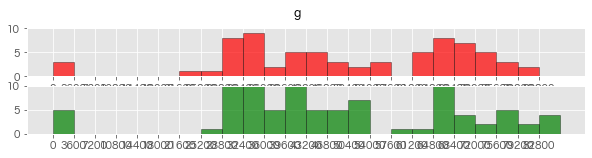

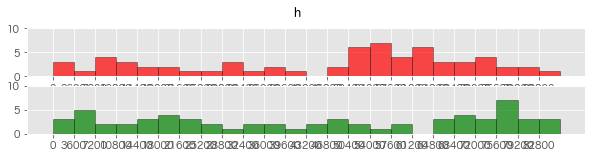

In [2]:
target = ["time_to_num", "battery"]
cover_name = ["a", "b", "c", "d", "e", "f", "g", "h"]

for i in range(len(users)):
    user = users[i]
    x_range = np.arange(0, 86400, 3600)
    color = ["red", "green", "blue", "yellow"]
    labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
    fig = plt.figure(figsize=(10, 3))

    first = 1
    last = 31

    ax1 = fig.add_subplot(311, xticks=x_range, ylim=(0, 10))
    ax2 = fig.add_subplot(312, xticks=x_range, ylim=(0, 10))

    ax1.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ][target[0]],
        bins=24,
        range=(0, 86400),
        ec="black",
        color=color[0],
        alpha=0.7,
    )

    ax2.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2022, 1, first))
            & (df["date"] < dt.datetime(2022, 1, last))
        ][target[0]],
        bins=24,
        range=(0, 86400),
        ec="black",
        color=color[1],
        alpha=0.7,
    )

    fig.suptitle(cover_name[i])
    # fig.savefig("bs_2_results/2months_{}_simple_compare_time_to_num.jpg".format(user))
    fig.show()

/var/folders/vq/5w5tvr9d2ns_2m_ynwknf3yc0000gn/T/ipykernel_27720/3351515655.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


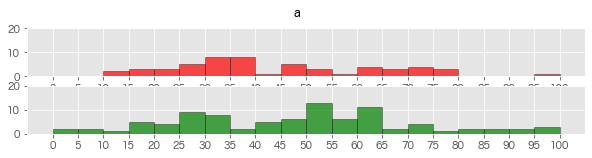

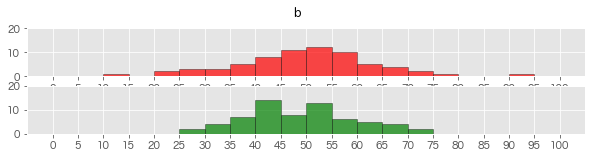

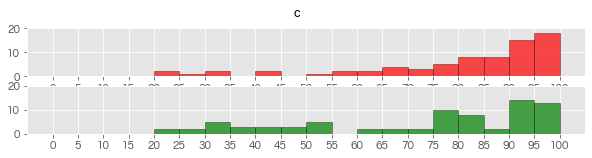

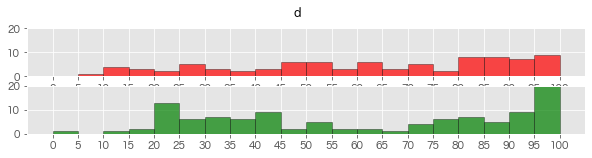

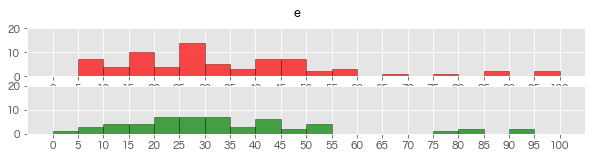

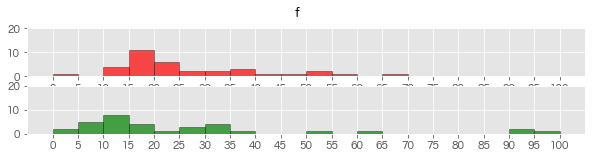

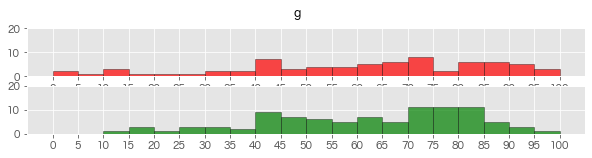

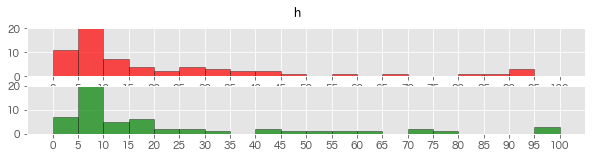

In [3]:
target = ["time_to_num", "battery"]
cover_name = ["a", "b", "c", "d", "e", "f", "g", "h"]


for i in range(len(users)):
    user = users[i]
    x_range = np.arange(0, 105, 5)
    color = ["red", "green", "blue", "yellow"]
    labels = ["a", "b", "c", "d", "e", "f", "g", "h"]
    fig = plt.figure(figsize=(10, 3))

    first = 1
    last = 31

    ax1 = fig.add_subplot(311, xticks=x_range, ylim=(0, 20))
    ax2 = fig.add_subplot(312, xticks=x_range, ylim=(0, 20))

    ax1.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ][target[1]],
        bins=20,
        range=(0, 100),
        ec="black",
        color=color[0],
        alpha=0.7,
    )

    ax2.hist(
        df.loc[
            (df["User"] == user)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2022, 1, first))
            & (df["date"] < dt.datetime(2022, 1, last))
        ][target[1]],
        bins=20,
        range=(0, 100),
        ec="black",
        color=color[1],
        alpha=0.7,
    )

    fig.suptitle(cover_name[i])
    # fig.savefig("bs_2_results/2months_{}_simple_compare_BL.jpg".format(user))
    fig.show()

In [4]:
def Frequency_Distribution(data, bins, class_width=None):
    data = np.asarray(data)

    #     bins = np.arange(0, 110, 10)
    hist = np.histogram(data, bins)[0]
    cumsum = hist.cumsum()

    return pd.DataFrame(
        {
            "階級値": (bins[1:] + bins[:-1]) / 2,
            "度数": hist,
            "累積度数": cumsum,
            "相対度数": hist / cumsum[-1],
            "累積相対度数": cumsum / cumsum[-1],
        },
        index=pd.Index(
            [f"{bins[i]}以上{bins[i+1]}未満" for i in range(hist.size)], name="階級"
        ),
    )

In [41]:
for j in range(len(users)):
    target = users[j]
    t_T = pd.DataFrame(
        df.loc[
            (df["User"] == target)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ]["battery"].copy()
    )
    t_T = t_T.set_index(np.arange(0, len(t_T)))
    t_T = Frequency_Distribution(t_T, np.arange(0, 105, 5))
    diff_list = []
    for i in range(len(users)):
        c_user = users[i]
        c_T = pd.DataFrame(
            df.loc[
                (df["User"] == c_user)
                & (df["state"] == "ON")
                & (df["date"] > dt.datetime(2022, 1, first))
                & (df["date"] < dt.datetime(2022, 1, last))
            ]["battery"].copy()
        )
        c_T = c_T.set_index(np.arange(0, len(c_T)))
        c_T = Frequency_Distribution(c_T, np.arange(0, 105, 5))
        diff = 0
        for g in range(len(t_T)):
            diff += (t_T["度数"][g] - c_T["度数"][g]) ** 2
        diff = 1 / (math.sqrt(diff) + 1)
        diff_list.append(diff)
        print("%-8s : %-8s → %.4f" % (target, c_user, diff))
    print(max(diff_list))

Narita   : Narita   → 0.0566
Narita   : Yusuke   → 0.0496
Narita   : Ayumi    → 0.0414
Narita   : Daiki    → 0.0317
Narita   : Shunya   → 0.0753
Narita   : Hayate   → 0.0636
Narita   : Moriyama → 0.0453
Narita   : Isshin   → 0.0303
0.07525470484963005
Yusuke   : Narita   → 0.0632
Yusuke   : Yusuke   → 0.1035
Yusuke   : Ayumi    → 0.0353
Yusuke   : Daiki    → 0.0286
Yusuke   : Shunya   → 0.0479
Yusuke   : Hayate   → 0.0406
Yusuke   : Moriyama → 0.0458
Yusuke   : Isshin   → 0.0270
0.10351694645735657
Ayumi    : Narita   → 0.0320
Ayumi    : Yusuke   → 0.0288
Ayumi    : Ayumi    → 0.0777
Ayumi    : Daiki    → 0.0483
Ayumi    : Shunya   → 0.0340
Ayumi    : Hayate   → 0.0349
Ayumi    : Moriyama → 0.0357
Ayumi    : Isshin   → 0.0251
0.07767387205027083
Daiki    : Narita   → 0.0558
Daiki    : Yusuke   → 0.0420
Daiki    : Ayumi    → 0.0595
Daiki    : Daiki    → 0.0417
Daiki    : Shunya   → 0.0496
Daiki    : Hayate   → 0.0474
Daiki    : Moriyama → 0.0568
Daiki    : Isshin   → 0.0291
0.0594834871

In [42]:
for j in range(len(users)):
    target = users[j]
    t_T = pd.DataFrame(
        df.loc[
            (df["User"] == target)
            & (df["state"] == "ON")
            & (df["date"] > dt.datetime(2021, 12, first))
            & (df["date"] < dt.datetime(2021, 12, last))
        ]["time_to_num"].copy()
    )
    t_T = t_T.set_index(np.arange(0, len(t_T)))
    t_T = Frequency_Distribution(t_T, np.arange(0, 86400, 3600))
    diff_list = []
    for i in range(len(users)):
        c_user = users[i]
        c_T = pd.DataFrame(
            df.loc[
                (df["User"] == c_user)
                & (df["state"] == "ON")
                & (df["date"] > dt.datetime(2022, 1, first))
                & (df["date"] < dt.datetime(2022, 1, last))
            ]["time_to_num"].copy()
        )
        c_T = c_T.set_index(np.arange(0, len(c_T)))
        c_T = Frequency_Distribution(c_T, np.arange(0, 86400, 3600))
        diff = 0

        for g in range(len(t_T)):
            diff += (t_T["度数"][g] - c_T["度数"][g]) ** 2
        diff = 1 / (math.sqrt(diff) + 1)
        diff_list.append(diff)
        print("%-8s : %-8s → %.4f" % (target, c_user, diff))
    print(max(diff_list))

Narita   : Narita   → 0.0571
Narita   : Yusuke   → 0.0750
Narita   : Ayumi    → 0.0561
Narita   : Daiki    → 0.0504
Narita   : Shunya   → 0.0665
Narita   : Hayate   → 0.0767
Narita   : Moriyama → 0.0391
Narita   : Isshin   → 0.0665
0.07667774013050205
Yusuke   : Narita   → 0.0595
Yusuke   : Yusuke   → 0.0853
Yusuke   : Ayumi    → 0.0514
Yusuke   : Daiki    → 0.0516
Yusuke   : Shunya   → 0.0588
Yusuke   : Hayate   → 0.0654
Yusuke   : Moriyama → 0.0355
Yusuke   : Isshin   → 0.0611
0.085296537673365
Ayumi    : Narita   → 0.0676
Ayumi    : Yusuke   → 0.0753
Ayumi    : Ayumi    → 0.1029
Ayumi    : Daiki    → 0.0694
Ayumi    : Shunya   → 0.0863
Ayumi    : Hayate   → 0.0614
Ayumi    : Moriyama → 0.0544
Ayumi    : Isshin   → 0.0648
0.10290397182775128
Daiki    : Narita   → 0.0526
Daiki    : Yusuke   → 0.0612
Daiki    : Ayumi    → 0.0541
Daiki    : Daiki    → 0.0597
Daiki    : Shunya   → 0.0544
Daiki    : Hayate   → 0.0473
Daiki    : Moriyama → 0.0433
Daiki    : Isshin   → 0.0546
0.061238075712